In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
dataset_path = 'D:/x-ray chest/chest2/Chest X_Ray Dataset'

In [3]:
image_paths = []
categories = []

categories_list = ['COVID19', 'NORMAL', 'PNEUMONIA', 'TURBERCULOSIS']

for category in categories_list:
    category_path = os.path.join(dataset_path, category)
    
    if os.path.exists(category_path):
        
        for image_name in os.listdir(category_path):
            image_path = os.path.join(category_path, image_name)
            image_paths.append(image_path)
            categories.append(category)

df = pd.DataFrame({'image_path': image_paths, 'category': categories})

In [4]:
df.head()

,image_path,category
0,D:/x-ray chest/chest2/Chest X_Ray Dataset\COVI...,COVID19
1,D:/x-ray chest/chest2/Chest X_Ray Dataset\COVI...,COVID19
2,D:/x-ray chest/chest2/Chest X_Ray Dataset\COVI...,COVID19
3,D:/x-ray chest/chest2/Chest X_Ray Dataset\COVI...,COVID19
4,D:/x-ray chest/chest2/Chest X_Ray Dataset\COVI...,COVID19


In [5]:
df.tail()

,image_path,category
9621,D:/x-ray chest/chest2/Chest X_Ray Dataset\TURB...,TURBERCULOSIS
9622,D:/x-ray chest/chest2/Chest X_Ray Dataset\TURB...,TURBERCULOSIS
9623,D:/x-ray chest/chest2/Chest X_Ray Dataset\TURB...,TURBERCULOSIS
9624,D:/x-ray chest/chest2/Chest X_Ray Dataset\TURB...,TURBERCULOSIS
9625,D:/x-ray chest/chest2/Chest X_Ray Dataset\TURB...,TURBERCULOSIS


In [6]:
df.shape

(9626, 2)

In [7]:
df.columns

Index(['image_path', 'category'], dtype='object')

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

image_path    0
category      0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9626 entries, 0 to 9625
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  9626 non-null   object
 1   category    9626 non-null   object
dtypes: object(2)
memory usage: 150.5+ KB


In [11]:
df['category'].unique()

array(['COVID19', 'NORMAL', 'PNEUMONIA', 'TURBERCULOSIS'], dtype=object)

In [12]:
df['category'].value_counts()

category
PNEUMONIA        4273
TURBERCULOSIS    3194
NORMAL           1583
COVID19           576
Name: count, dtype: int64

C:\Users\anshs\AppData\Local\Temp\ipykernel_11472\1308098446.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


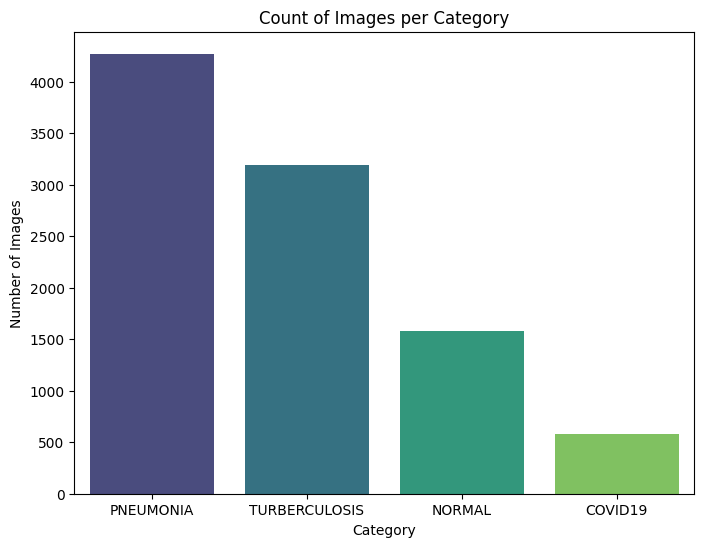

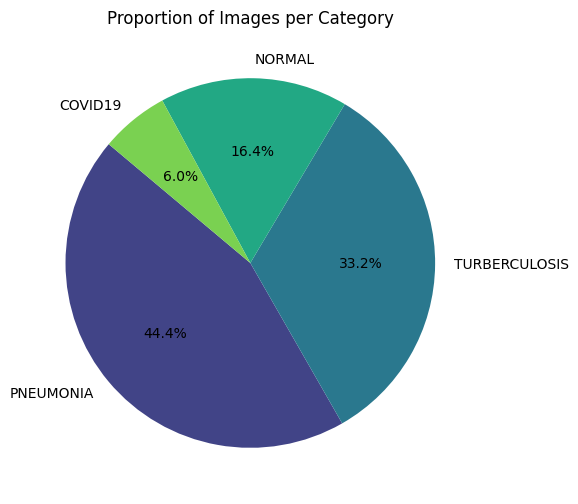

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

category_counts = df['category'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.title("Count of Images per Category")
plt.xlabel("Category")
plt.ylabel("Number of Images")
plt.show()

plt.figure(figsize=(8, 6))
plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(category_counts)))
plt.title("Proportion of Images per Category")
plt.show()

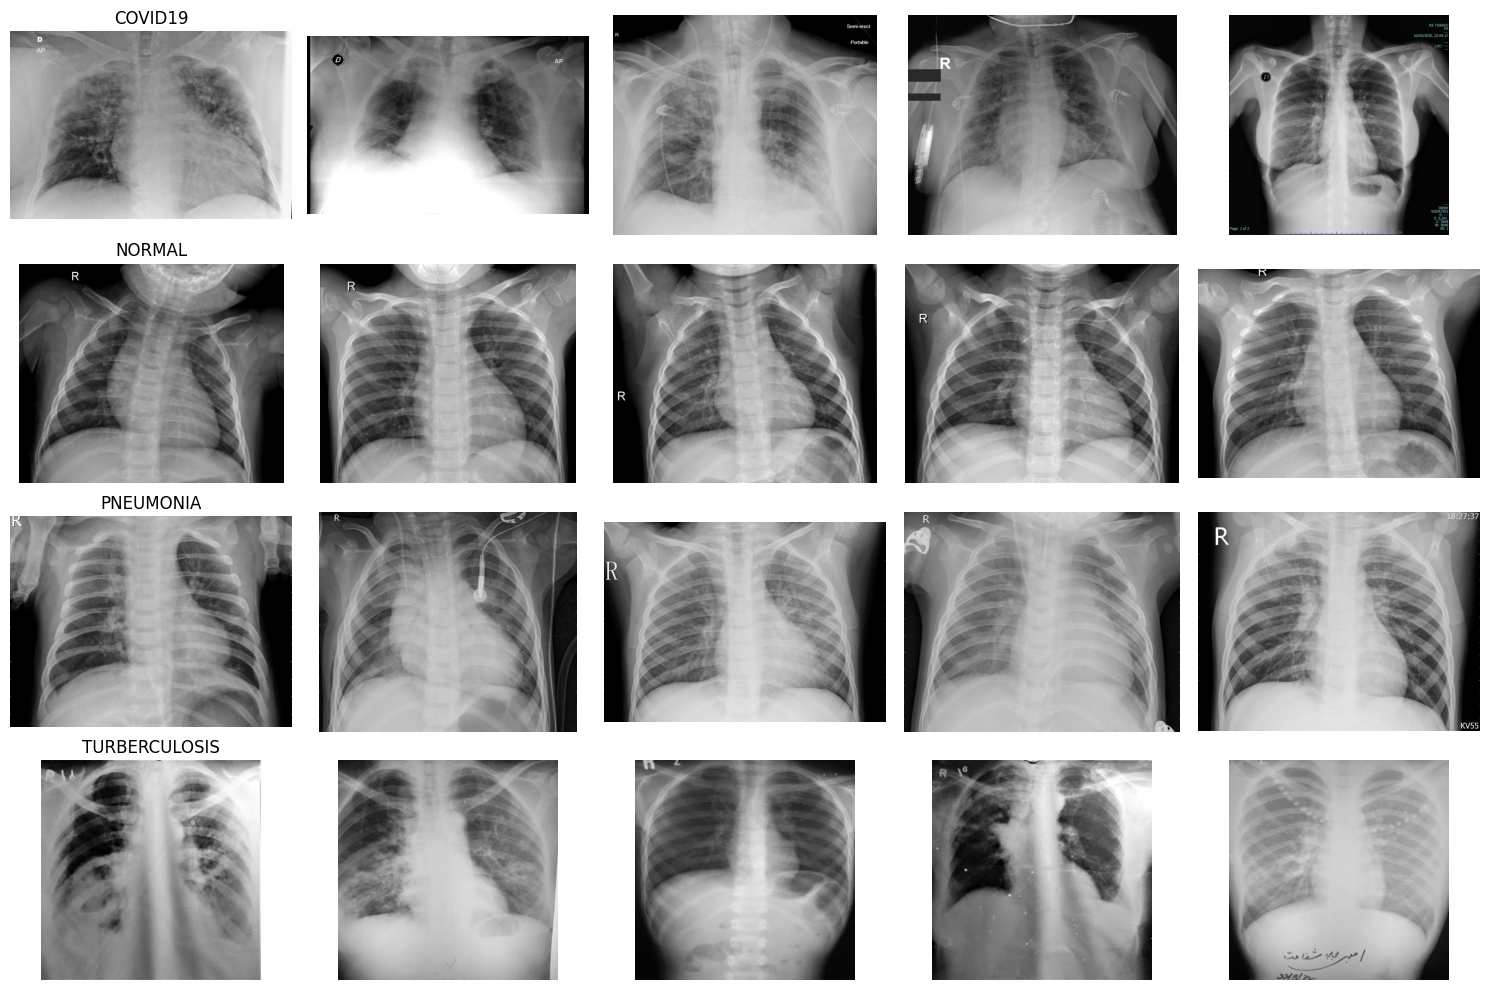

In [14]:
import random
from PIL import Image

num_images_per_category = 5

plt.figure(figsize=(15, 10))

for i, category in enumerate(df['category'].unique()):

    category_images = df[df['category'] == category]['image_path']
    
    selected_images = random.sample(list(category_images), num_images_per_category)
    
    for j, image_path in enumerate(selected_images):

        img = Image.open(image_path)
        
        plt.subplot(len(df['category'].unique()), num_images_per_category, i * num_images_per_category + j + 1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        plt.title(category if j == 0 else "") 

plt.tight_layout()
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['category_encoded'] = label_encoder.fit_transform(df['category'])

In [16]:
df

,image_path,category,category_encoded
0,D:/x-ray chest/chest2/Chest X_Ray Dataset\COVI...,COVID19,0
1,D:/x-ray chest/chest2/Chest X_Ray Dataset\COVI...,COVID19,0
2,D:/x-ray chest/chest2/Chest X_Ray Dataset\COVI...,COVID19,0
3,D:/x-ray chest/chest2/Chest X_Ray Dataset\COVI...,COVID19,0
4,D:/x-ray chest/chest2/Chest X_Ray Dataset\COVI...,COVID19,0
...,...,...,...
9621,D:/x-ray chest/chest2/Chest X_Ray Dataset\TURB...,TURBERCULOSIS,3
9622,D:/x-ray chest/chest2/Chest X_Ray Dataset\TURB...,TURBERCULOSIS,3
9623,D:/x-ray chest/chest2/Chest X_Ray Dataset\TURB...,TURBERCULOSIS,3
9624,D:/x-ray chest/chest2/Chest X_Ray Dataset\TURB...,TURBERCULOSIS,3


In [17]:
df = df[['image_path', 'category_encoded']]

In [19]:
from imblearn.over_sampling import RandomOverSampler

In [20]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(df[['image_path']], df['category_encoded'])

In [21]:
df_resampled = pd.DataFrame(X_resampled, columns=['image_path'])
df_resampled['category_encoded'] = y_resampled

In [22]:
print("\nClass distribution after oversampling:")
print(df_resampled['category_encoded'].value_counts())


Class distribution after oversampling:
category_encoded
0    4273
1    4273
2    4273
3    4273
Name: count, dtype: int64


In [23]:
df_resampled

,image_path,category_encoded
0,D:/x-ray chest/chest2/Chest X_Ray Dataset\COVI...,0
1,D:/x-ray chest/chest2/Chest X_Ray Dataset\COVI...,0
2,D:/x-ray chest/chest2/Chest X_Ray Dataset\COVI...,0
3,D:/x-ray chest/chest2/Chest X_Ray Dataset\COVI...,0
4,D:/x-ray chest/chest2/Chest X_Ray Dataset\COVI...,0
...,...,...
17087,D:/x-ray chest/chest2/Chest X_Ray Dataset\TURB...,3
17088,D:/x-ray chest/chest2/Chest X_Ray Dataset\TURB...,3
17089,D:/x-ray chest/chest2/Chest X_Ray Dataset\TURB...,3
17090,D:/x-ray chest/chest2/Chest X_Ray Dataset\TURB...,3


In [24]:
import time
import shutil
import pathlib
import itertools
from PIL import Image

import cv2
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

import warnings
warnings.filterwarnings("ignore")

print ('check')

check


In [25]:
df_resampled['category_encoded'] = df_resampled['category_encoded'].astype(str)

In [26]:
train_df_new, temp_df_new = train_test_split(
    df_resampled,
    train_size=0.8,  
    shuffle=True,
    random_state=42,
    stratify=df_resampled['category_encoded']  
)

valid_df_new, test_df_new = train_test_split(
    temp_df_new,
    test_size=0.5,  
    shuffle=True,
    random_state=42,
    stratify=temp_df_new['category_encoded'] 
)

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 16
img_size = (224, 224)
channels = 3  
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator(rescale=1./255)  
ts_gen = ImageDataGenerator(rescale=1./255)

train_gen_new = tr_gen.flow_from_dataframe(
    train_df_new,
    x_col='image_path',  
    y_col='category_encoded',     
    target_size=img_size,
    class_mode='sparse',  
    color_mode='rgb', 
    shuffle=True,
    batch_size=batch_size
)

valid_gen_new = ts_gen.flow_from_dataframe(
    valid_df_new,
    x_col='image_path',  
    y_col='category_encoded',     
    target_size=img_size,
    class_mode='sparse',  
    color_mode='rgb', 
    shuffle=True,
    batch_size=batch_size
)

test_gen_new = ts_gen.flow_from_dataframe(
    test_df_new,
    x_col='image_path', 
    y_col='category_encoded',    
    target_size=img_size,
    class_mode='sparse',  
    color_mode='rgb', 
    shuffle=False,  
    batch_size=batch_size
)

Found 13673 validated image filenames belonging to 4 classes.
Found 1709 validated image filenames belonging to 4 classes.
Found 1710 validated image filenames belonging to 4 classes.


In [28]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [29]:
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    print("Using GPU")
else:
    print("Using CPU")

Using CPU


In [30]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [31]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise, Input, MultiHeadAttention, Reshape
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def create_vgg19_model(input_shape):
  
    inputs = Input(shape=input_shape)
    
    base_model = VGG19(weights='imagenet', input_tensor=inputs, include_top=False)
    
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output

    height, width, channels = 7, 7, 512   
    x = Reshape((height * width, channels))(x)
   
    attention_output = MultiHeadAttention(num_heads=8, key_dim=channels)(x, x)

    attention_output = Reshape((height, width, channels))(attention_output)
    
    x = GaussianNoise(0.25)(attention_output)
    
    x = GlobalAveragePooling2D()(x)
    
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)
    
    outputs = Dense(4, activation='softmax')(x)
    
    model = Model(inputs=inputs, outputs=outputs)

    return model

input_shape = (224, 224, 3)

cnn_model = create_vgg19_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


In [32]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/5
855/855 ━━━━━━━━━━━━━━━━━━━━ 1996s 2s/step - accuracy: 0.8212 - loss: 0.4569 - val_accuracy: 0.6934 - val_loss: 1.2184
Epoch 2/5
855/855 ━━━━━━━━━━━━━━━━━━━━ 2008s 2s/step - accuracy: 0.9388 - loss: 0.1820 - val_accuracy: 0.9643 - val_loss: 0.0958
Epoch 3/5
855/855 ━━━━━━━━━━━━━━━━━━━━ 2024s 2s/step - accuracy: 0.9580 - loss: 0.1241 - val_accuracy: 0.7150 - val_loss: 1.0156
Epoch 4/5
855/855 ━━━━━━━━━━━━━━━━━━━━ 2002s 2s/step - accuracy: 0.9662 - loss: 0.1019 - val_accuracy: 0.6068 - val_loss: 1.4435
Epoch 5/5
855/855 ━━━━━━━━━━━━━━━━━━━━ 2026s 2s/step - accuracy: 0.9699 - loss: 0.0916 - val_accuracy: 0.9713 - val_loss: 0.0837


In [33]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_classes = np.argmax(predictions, axis=1)

107/107 ━━━━━━━━━━━━━━━━━━━━ 206s 2s/step


In [34]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       427
           1       0.95      0.99      0.97       427
           2       1.00      0.93      0.96       428
           3       0.99      0.99      0.99       428

    accuracy                           0.98      1710
   macro avg       0.98      0.98      0.98      1710
weighted avg       0.98      0.98      0.98      1710



In [35]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

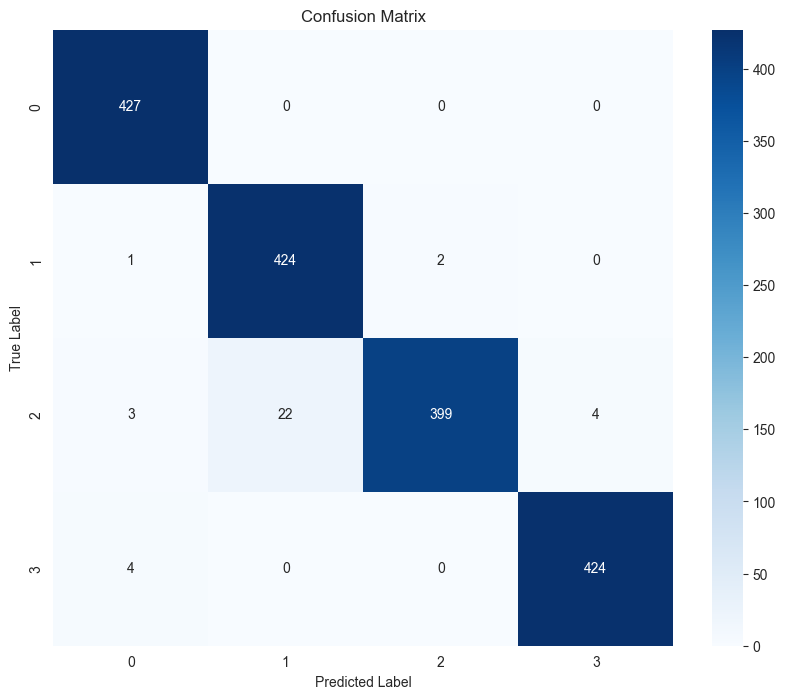

In [36]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise, Input, MultiHeadAttention, Reshape
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def create_mobilenet_model(input_shape):

    inputs = Input(shape=input_shape)
  
    base_model = MobileNet(weights='imagenet', input_tensor=inputs, include_top=False)
    
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output

    height, width, channels = 7, 7, 1024  
    x = Reshape((height * width, channels))(x)
   
    attention_output = MultiHeadAttention(num_heads=8, key_dim=channels)(x, x)

    attention_output = Reshape((height, width, channels))(attention_output)
    
    x = GaussianNoise(0.25)(attention_output)
    
    x = GlobalAveragePooling2D()(x)
    
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)
    
    outputs = Dense(4, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)

    return model

input_shape = (224, 224, 3)

cnn_model = create_mobilenet_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [38]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/5
855/855 ━━━━━━━━━━━━━━━━━━━━ 881s 1s/step - accuracy: 0.9010 - loss: 0.2723 - val_accuracy: 0.9666 - val_loss: 0.0896
Epoch 2/5
855/855 ━━━━━━━━━━━━━━━━━━━━ 864s 1s/step - accuracy: 0.9757 - loss: 0.0725 - val_accuracy: 0.9473 - val_loss: 0.1949
Epoch 3/5
855/855 ━━━━━━━━━━━━━━━━━━━━ 863s 1s/step - accuracy: 0.9854 - loss: 0.0469 - val_accuracy: 0.9315 - val_loss: 0.1984
Epoch 4/5
855/855 ━━━━━━━━━━━━━━━━━━━━ 865s 1s/step - accuracy: 0.9874 - loss: 0.0384 - val_accuracy: 0.9836 - val_loss: 0.0488
Epoch 5/5
855/855 ━━━━━━━━━━━━━━━━━━━━ 932s 1s/step - accuracy: 0.9924 - loss: 0.0212 - val_accuracy: 0.9871 - val_loss: 0.0391


In [44]:
cnn_model.save('cnn_chest.h5')

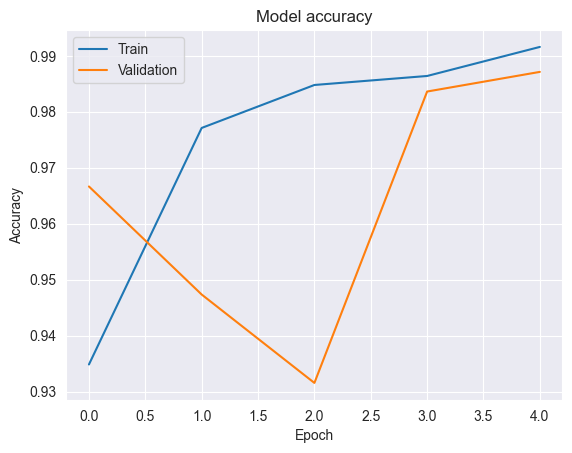

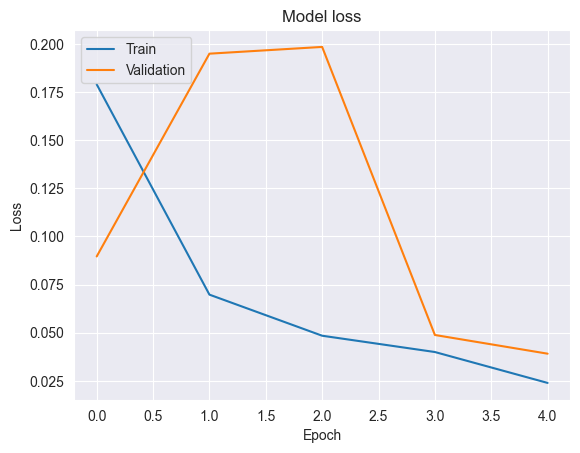

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [40]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_classes = np.argmax(predictions, axis=1)

107/107 ━━━━━━━━━━━━━━━━━━━━ 47s 437ms/step


In [41]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       427
           1       0.97      0.98      0.98       427
           2       0.98      0.97      0.97       428
           3       0.99      1.00      1.00       428

    accuracy                           0.99      1710
   macro avg       0.99      0.99      0.99      1710
weighted avg       0.99      0.99      0.99      1710



In [42]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

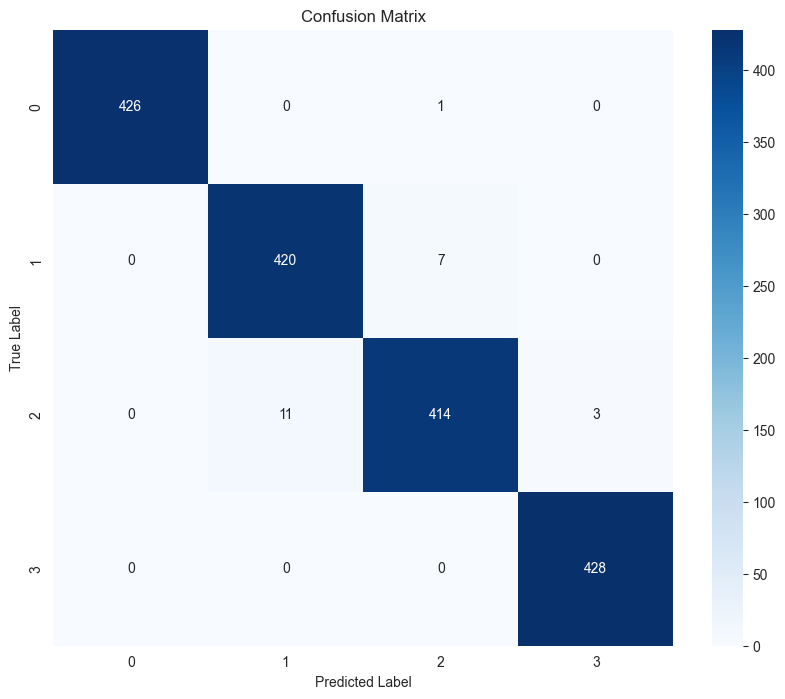

In [43]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [4]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load your trained VGG19 model
vgg19_model = load_model('cnn_chest.h5')

print("Model loaded successfully!")



Model loaded successfully!


In [4]:
# Print all layer names of the model
for layer in vgg19_model.layers:
    print(layer.name)


input_layer_1
conv1
conv1_bn
conv1_relu
conv_dw_1
conv_dw_1_bn
conv_dw_1_relu
conv_pw_1
conv_pw_1_bn
conv_pw_1_relu
conv_pad_2
conv_dw_2
conv_dw_2_bn
conv_dw_2_relu
conv_pw_2
conv_pw_2_bn
conv_pw_2_relu
conv_dw_3
conv_dw_3_bn
conv_dw_3_relu
conv_pw_3
conv_pw_3_bn
conv_pw_3_relu
conv_pad_4
conv_dw_4
conv_dw_4_bn
conv_dw_4_relu
conv_pw_4
conv_pw_4_bn
conv_pw_4_relu
conv_dw_5
conv_dw_5_bn
conv_dw_5_relu
conv_pw_5
conv_pw_5_bn
conv_pw_5_relu
conv_pad_6
conv_dw_6
conv_dw_6_bn
conv_dw_6_relu
conv_pw_6
conv_pw_6_bn
conv_pw_6_relu
conv_dw_7
conv_dw_7_bn
conv_dw_7_relu
conv_pw_7
conv_pw_7_bn
conv_pw_7_relu
conv_dw_8
conv_dw_8_bn
conv_dw_8_relu
conv_pw_8
conv_pw_8_bn
conv_pw_8_relu
conv_dw_9
conv_dw_9_bn
conv_dw_9_relu
conv_pw_9
conv_pw_9_bn
conv_pw_9_relu
conv_dw_10
conv_dw_10_bn
conv_dw_10_relu
conv_pw_10
conv_pw_10_bn
conv_pw_10_relu
conv_dw_11
conv_dw_11_bn
conv_dw_11_relu
conv_pw_11
conv_pw_11_bn
conv_pw_11_relu
conv_pad_12
conv_dw_12
conv_dw_12_bn
conv_dw_12_relu
conv_pw_12
conv_pw_12_bn
c

In [5]:
import cv2
import numpy as np

def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img_resized = cv2.resize(img, (224, 224))
    img_resized = img_resized / 255.0
    img_resized = np.expand_dims(img_resized, axis=0)
    return img_resized

def get_prediction_and_feature_map(image_path, model):
    img = preprocess_image(image_path)
    prediction = model.predict(img)
    class_idx = np.argmax(prediction)

    # Extract feature maps from 'conv_dw_13' layer
    feature_model = tf.keras.Model(inputs=model.input, outputs=model.get_layer("conv_dw_13").output)
    feature_map = feature_model.predict(img)

    return class_idx, feature_map.squeeze()

# Example usage
image_path = 'D:/x-ray chest/chest/train/TURBERCULOSIS/Tuberculosis-1.png'
class_idx, feature_map = get_prediction_and_feature_map(image_path, vgg19_model)
print(f"Predicted Class Index: {class_idx}")
print(f"Feature Map Shape: {feature_map.shape}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step
Predicted Class Index: 3
Feature Map Shape: (7, 7, 1024)


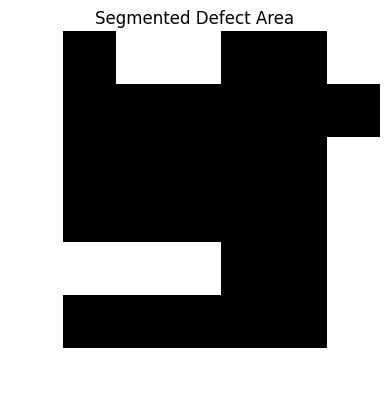

In [6]:
import matplotlib.pyplot as plt

def segment_defect_area(feature_map):
    # Average the feature map along the channel axis
    defect_map = np.mean(feature_map, axis=-1)
    # Normalize the map
    defect_map = (defect_map - defect_map.min()) / (defect_map.max() - defect_map.min())
    # Apply threshold to segment the defect area
    segmented_mask = (defect_map > 0.5).astype(np.uint8)

    plt.imshow(segmented_mask, cmap='gray')
    plt.title("Segmented Defect Area")
    plt.axis('off')
    plt.show()

    return segmented_mask


# Example usage
segmented_mask = segment_defect_area(feature_map)


Lung Mesh Details:
PolyData (0x128a10aae60)
  N Cells:    63974
  N Points:   191922
  N Strips:   0
  X Bounds:   -1.086e-01, 1.147e-01
  Y Bounds:   -4.705e-02, 3.217e-01
  Z Bounds:   -1.273e-01, 1.509e-02
  N Arrays:   7


c:\Users\anshs\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (c:\Users\anshs\AppData\Local\Programs\Python\Python312\Lib\site-packages\trame\widgets\__init__.py)

Falling back to a static output.
  warnings.warn(


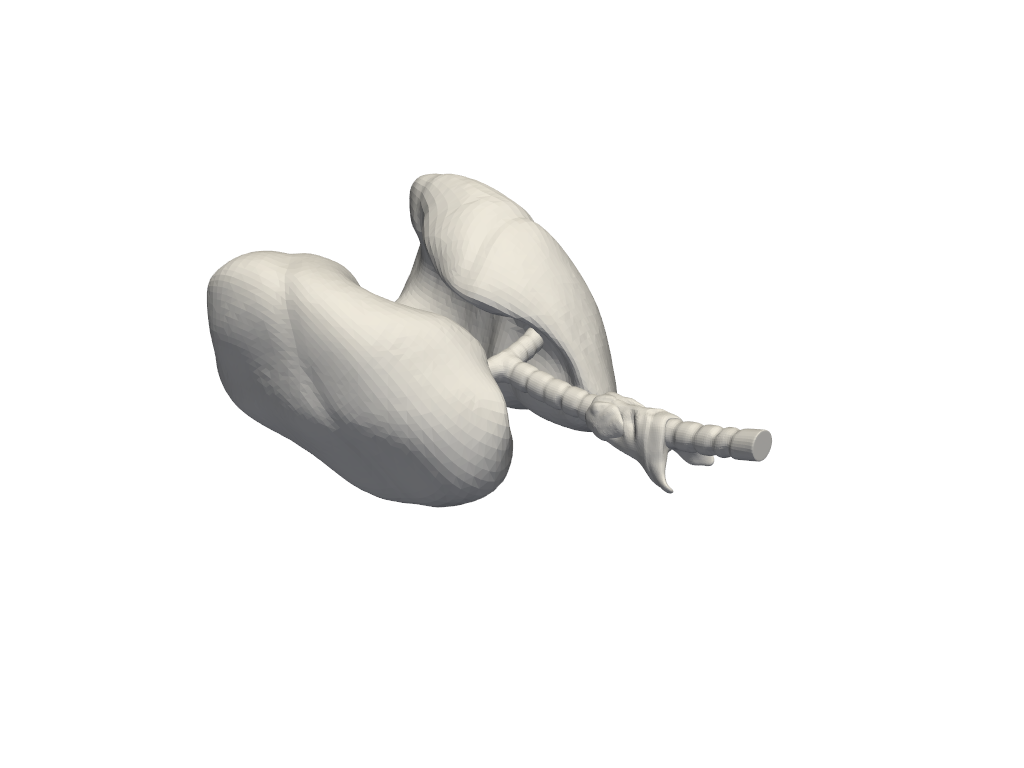

In [17]:
import pyvista as pv
import vtk

# Load the 3D lung model
obj_path = "D:/x-ray chest/untitled.obj"
reader = vtk.vtkOBJReader()
reader.SetFileName(obj_path)
reader.Update()

# Wrap the VTK object into PyVista format
lung_mesh = pv.wrap(reader.GetOutput())

# Debug: Print details about the mesh
print("Lung Mesh Details:")
print(lung_mesh)

# Plot the mesh alone to confirm it's correctly loaded
plotter = pv.Plotter()
plotter.add_mesh(lung_mesh, color="white", opacity=1.0)  # Add the mesh
plotter.show()
